# Draw Confusion Matrix
draw confusion martrix from saved .pt file.

In [31]:
import torch 

gait_cycle = 'late fusion'
pref_path = "/workspace/code/logs/late_fusion/resnet/2024-06-07/9/14-35-16/best_preds"

label = torch.load(f"{pref_path}/resnet_0_label.pt")
pred = torch.load(f"{pref_path}/resnet_0_pred.pt")

In [32]:
# load all fold 
all_label = []
all_pred = []	

for i in range(3):
	label = torch.load(f"{pref_path}/resnet_{i}_label.pt")
	pred = torch.load(f"{pref_path}/resnet_{i}_pred.pt")
	all_label.append(label)
	all_pred.append(pred)
	

In [33]:
all_label = torch.cat(all_label)
all_pred = torch.cat(all_pred)

In [34]:
all_label.shape, all_pred.shape

(torch.Size([3144]), torch.Size([3144, 9]))

****************************************************************************************************
accuracy: tensor(0.1111)
precision: tensor(0.0122)
_binary_recall: tensor(0.1111)
_binary_f1: tensor(0.0219)
_aurroc: tensor(0.4932)
_confusion_matrix: tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.]])
####################################################################################################


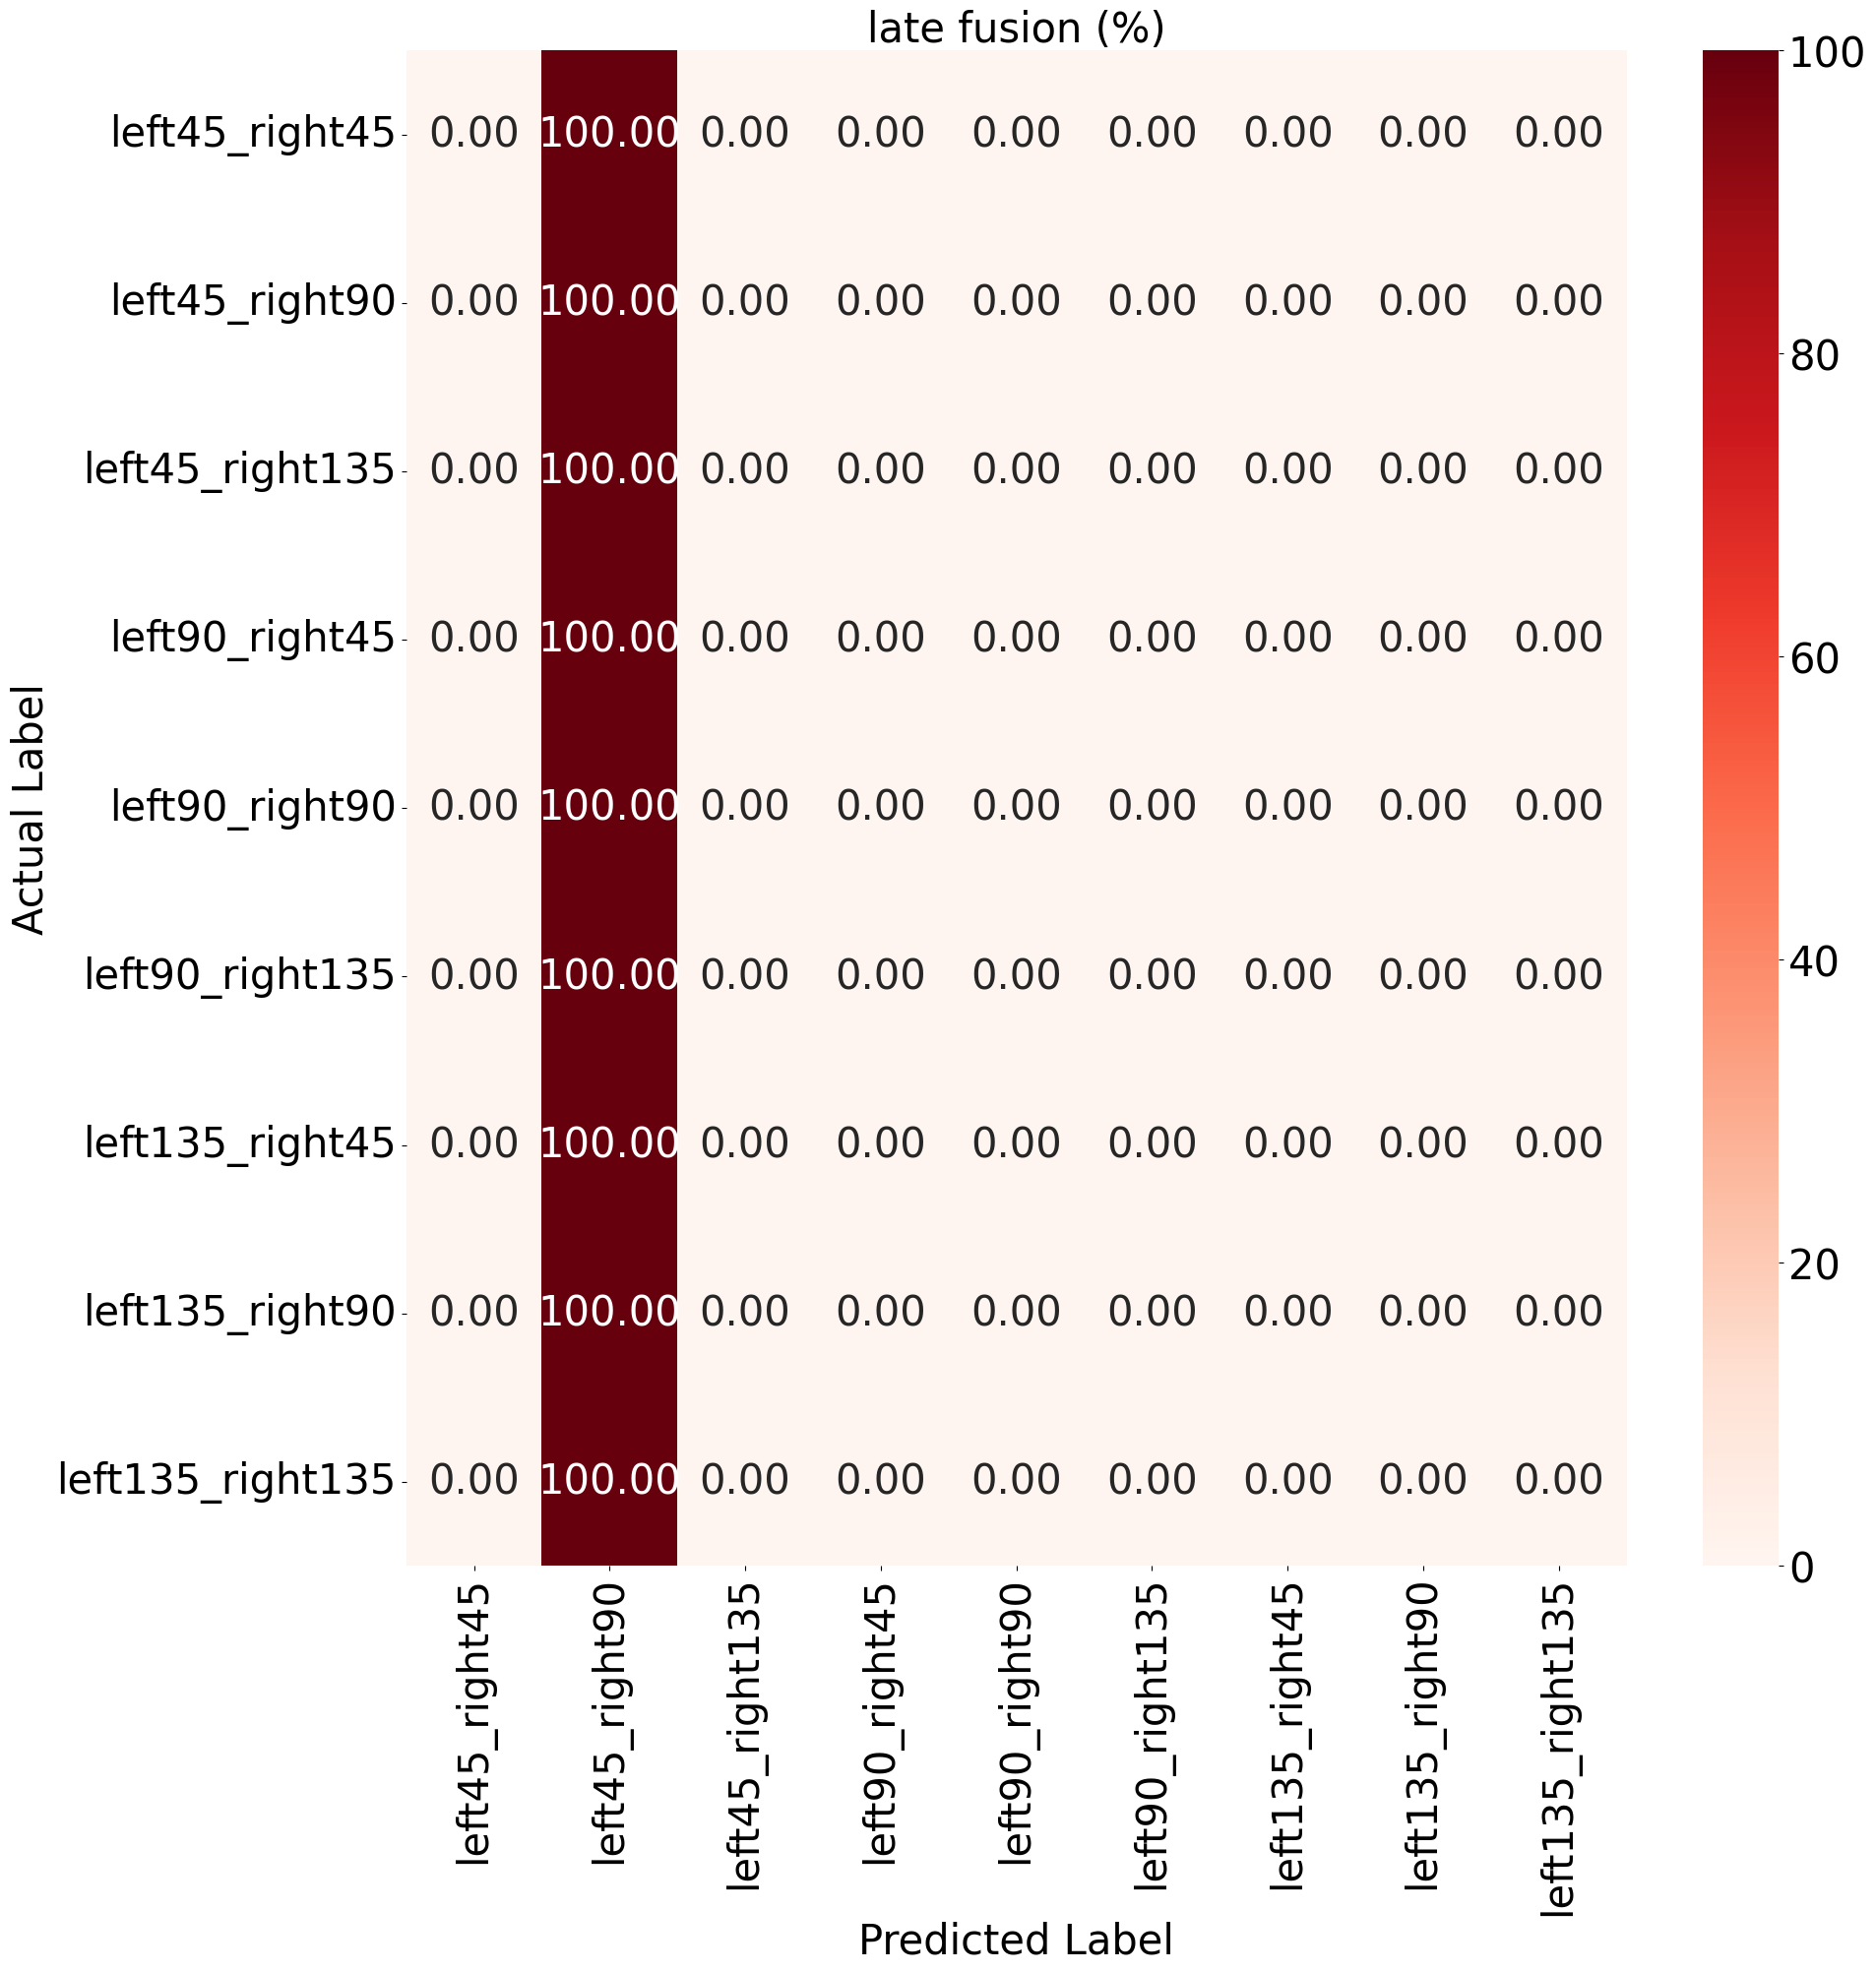

In [35]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 9
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(all_pred, all_label))
print('precision: %s' % _precision(all_pred, all_label))
print('_binary_recall: %s' % _recall(all_pred, all_label))
print('_binary_f1: %s' % _f1_score(all_pred, all_label))
print('_aurroc: %s' % _auroc(all_pred, all_label))
print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
print('#' * 100)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

axis_labels = [
    "left45_right45",
    "left45_right90",
    "left45_right135",
    "left90_right45",
    "left90_right90",
    "left90_right135",
    "left135_right45",
    "left135_right90",
    "left135_right135"
]

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()